# Respondents with multiple positions

We noticed that there are some respondents who have several positions at the same time.
It might be worth looking into to understand if there is a regional bias and a deeper reason to this.
This might also simplify some of the analysis as we are unsure how to count these answers.

Related to [Issue 19](https://github.com/GloBIAS-BioimageAnalysts/Survey_2024/issues/19).

In [1]:
# read in data
import pandas
import seaborn as sns

df = pandas.read_csv('../data/survey2024_headerscleaned.csv')

Let's take a quick look at all the possible replies.

In [2]:
possible_answers = df['Which of these describe your position Choose all options that apply'].unique()
print(possible_answers)

['staff scientist in a core facility' 'PhD student' 'professor'
 'postdoctoral researcher' 'PhD student, postdoctoral researcher'
 'PhD student, staff scientist researcher, staff scientist in a core facility'
 'staff scientist researcher'
 'staff scientist researcher, staff scientist in a core facility, professor'
 'staff scientist researcher,' 'core facility head'
 'postdoctoral researcher, staff scientist researcher'
 'junior group leader' 'core facility head, junior group leader'
 'staff scientist researcher, staff scientist in a core facility'
 'MSc student' 'research engineer' 'staff engineer in a core facility'
 'Research Engineer'
 'staff scientist in a core facility, Research Software Engineer (with a strong interest in image analysis)'
 'postdoctoral researcher, staff scientist in a core facility'
 'staff scientist in a core facility, core facility head'
 'PhD student, staff scientist in a core facility'
 'PhD student, Clinical data scientist'
 'Director of Data, AI and Analys

In [3]:
df = df.dropna(subset=["Which of these describe your position Choose all options that apply"])
df["positions"] = df["Which of these describe your position Choose all options that apply"].apply(lambda x: set(filter(None, x.lower().replace(', ', ',').split(','))))
df["number_of_positions"] = df["positions"].apply(len)

In [4]:
df["number_of_positions"].value_counts().sort_index()

number_of_positions
1    244
2     40
3      6
Name: count, dtype: int64

There are 6 people with three different positions.
Let's take a closer look into this.

In [5]:
print(df.query("number_of_positions == 3")["positions"].values)

[{'phd student', 'staff scientist in a core facility', 'staff scientist researcher'}
 {'staff scientist in a core facility', 'professor', 'staff scientist researcher'}
 {'junior group leader', 'staff scientist researcher', 'associate professor'}
 {'staff scientist in a core facility', 'staff scientist researcher', 'core facility head'}
 {'staff scientist in a core facility', 'junior group leader', 'staff scientist researcher'}
 {'staff scientist in a core facility', 'postdoctoral researcher', 'staff scientist researcher'}]


All of them have `staff scientist researcher` and `staff scientist in a core facility`.

Each of them have a different third position such as:
- `PhD student`
- `postdoctoral researcher`
- `junior group leader`
- `junior group leader`and `Associate Professor`
- `core facility head`
- `professor`


<Axes: xlabel='positions'>

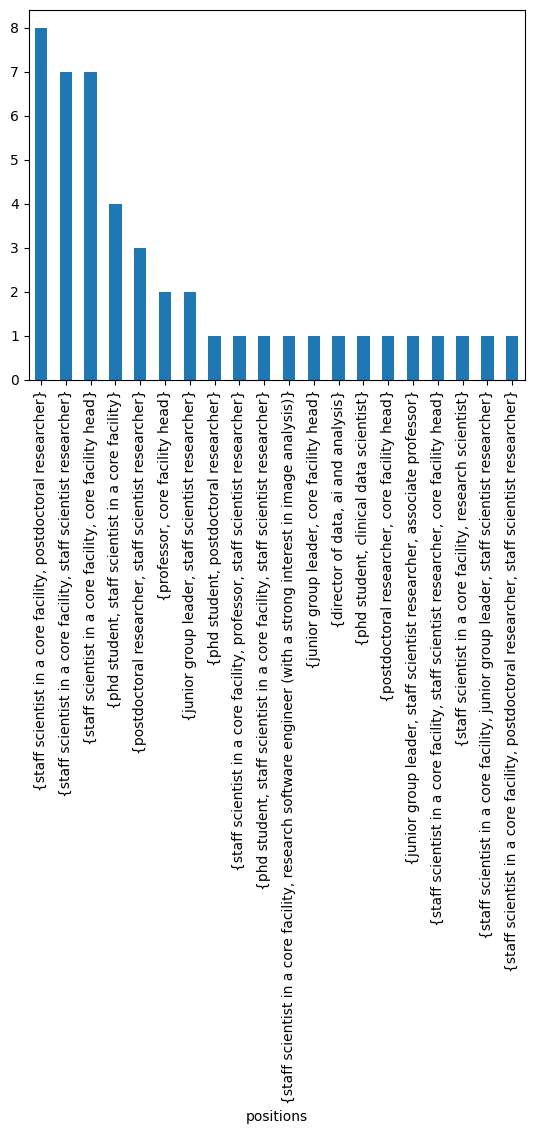

In [6]:
df.query("number_of_positions >= 2")["positions"].value_counts().plot(kind='bar')

The most common columns correspond to staff scientists in core facilities that also are postdoctoral researchers, staff scientist researchers, core facility heads or PhD students, in that order.

There are two core facility heads wich are also proofessors (see below for regional analysis).

The other combinations happen only once.

<Axes: xlabel='positions'>

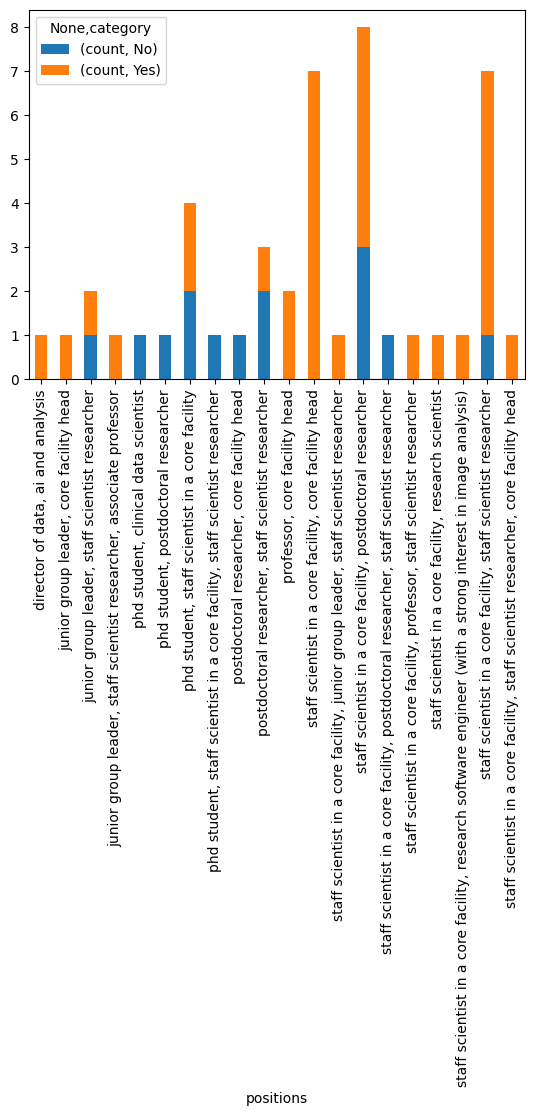

In [7]:
stack_column = "Are you currently in a permanent position"

categorized_df = []
for category, selected_df in df.query("number_of_positions >= 2").groupby(stack_column):
    this_df = pandas.DataFrame(selected_df["positions"].value_counts())
    this_df = this_df.reset_index()
    this_df["positions"] = this_df.positions.apply(lambda x: ", ".join(x))
    this_df["category"] = category
    categorized_df.append(this_df)
categorized_df = pandas.concat(categorized_df, ignore_index=True)

categorized_df.set_index(["positions", "category"]).unstack().plot(kind='bar', stacked=True)

There are not enough cases to reach formal conclusions.

Core facility heads seem to correlate with permanent positions, except for one case who is not permanent and is also a postdoctoral researcher.

Half of the PhD students working in as staff scientist in a core facility have permanent positions. Other PhD students don't have permanent positions and include a clinical data sceintist and a postdoctoral researcher.

Five out of eight staff scientist in core facilities and postdoctoral researchers have a permanent position. Six out of seven staff scientist researcher and staff scientist in a core facility have a permanent position. If we group together staff scientist in a core facility and staff scientist researcher: six out of eleven who also are postdoctoral researchers have permanent positions; and 7 out of 8 who are not postdoctoral researchers have permanent positions.

<Axes: xlabel='positions'>

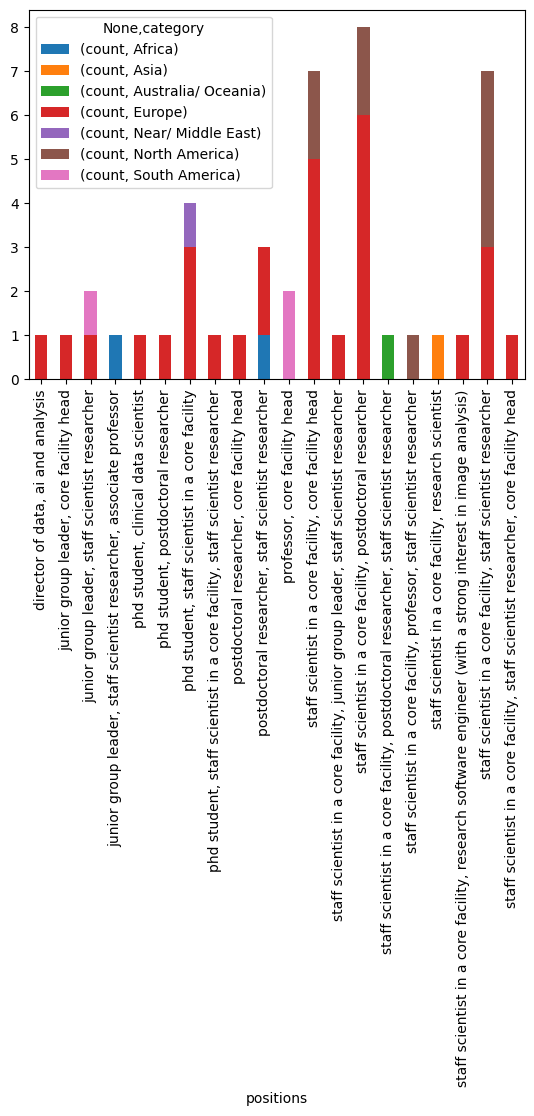

In [8]:
stack_column = "What is your location"

categorized_df = []
for category, selected_df in df.query("number_of_positions >= 2").groupby(stack_column):
    this_df = pandas.DataFrame(selected_df["positions"].value_counts())
    this_df = this_df.reset_index()
    this_df["positions"] = this_df.positions.apply(lambda x: ", ".join(x))
    this_df["category"] = category
    categorized_df.append(this_df)
categorized_df = pandas.concat(categorized_df, ignore_index=True)

categorized_df.set_index(["positions", "category"]).unstack().plot(kind='bar', stacked=True)

There are not enough numbers to reach formal conclusions.

Europe replies are well spread throughout the different combinations.

Both replies that are core facility head and proffesor come from South America.

The single reply from Near/middle East has a combined role of PhD Student and staff scientist in core facility.

## Main tasks of staff scientists

The main difference between `staff scientist in a core facility` and `staff scientist researcher` should be the time allocated to service or researching tasks. Is this hypothesis true?

To answer this question we will first select all replies that come from `staff scientist in a core facility` and/or `staff scientist researcher`.
We would also like to group applicants into only `staff scientist in a core facility`, only `staff scientist researcher` and `both`.

In [9]:
def process_staff_scientist(roles):
    if "staff scientist in a core facility" in roles and "staff scientist researcher" in roles:
        return "both"
    if "staff scientist in a core facility" in roles:
        return "staff scientist in a core facility"
    if "staff scientist researcher" in roles:
        return "staff scientist researcher"
    else:
        return "other"
    
df["staff_scientist_role"] = df["positions"].apply(process_staff_scientist)

In [10]:
selection = ["staff scientist in a core facility", "staff scientist researcher", "both"]
question_7 = ["Q7 How much of your time do you spend on each of the following  [bioimage analysis instruction]", 
             "Q7 How much of your time do you spend on each of the following  [bioimage analysis service]",
             "Q7 How much of your time do you spend on each of the following  [bioimage analysis infrastructure development and maintenance]",
             "Q7 How much of your time do you spend on each of the following  [own bioimage analysis project]",
             "Q7 How much of your time do you spend on each of the following  [bioimage analysis tool development not bound to a single service project]",
             "Q7 How much of your time do you spend on each of the following  [management or administration]",]
selected_df = df[df.staff_scientist_role.isin(selection)].copy()
selected_df[question_7]

,Q7 How much of your time do you spend on each of the following [bioimage analysis instruction],Q7 How much of your time do you spend on each of the following [bioimage analysis service],Q7 How much of your time do you spend on each of the following [bioimage analysis infrastructure development and maintenance],Q7 How much of your time do you spend on each of the following [own bioimage analysis project],Q7 How much of your time do you spend on each of the following [bioimage analysis tool development not bound to a single service project],Q7 How much of your time do you spend on each of the following [management or administration]
0,0-25%,0-25%,0-25%,0-25%,NaN,NaN
5,0-25%,50-75%,0-25%,0%,0-25%,0-25%
10,0-25%,0-25%,NaN,0-25%,NaN,0-25%
12,0-25%,0-25%,0-25%,NaN,NaN,0-25%
13,0-25%,0-25%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
275,0-25%,NaN,NaN,25-50%,NaN,NaN
280,50-75%,NaN,NaN,0-25%,NaN,NaN
283,0%,0%,0%,25-50%,0-25%,0-25%
287,NaN,NaN,NaN,NaN,NaN,NaN


We should remove the rows for which no answer was reported.
We will also replace the remaining `NaN` by `0%` as it means that they do not spend time on that task.
This can be removed by commenting the second line in the following cell.

In [11]:
selected_df.dropna(subset=question_7, how='all', inplace=True)
selected_df.fillna('0%', inplace=True)

for question in question_7:
    selected_df[question] = selected_df[question].astype(str)
    selected_df[question] = pandas.Categorical(selected_df[question], ["0%", "0-25%", "25-50%", "50-75%", "75-100%"])

<Axes: >

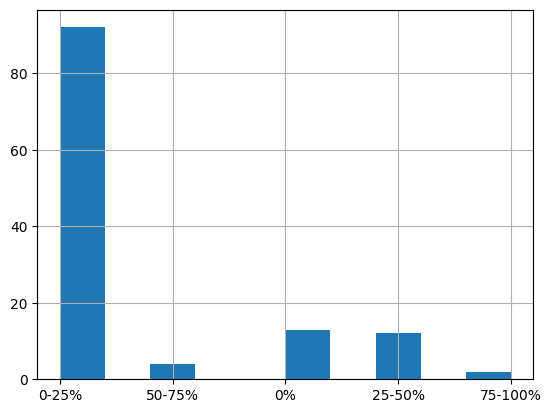

In [12]:
selected_df[question_7[0]].hist()

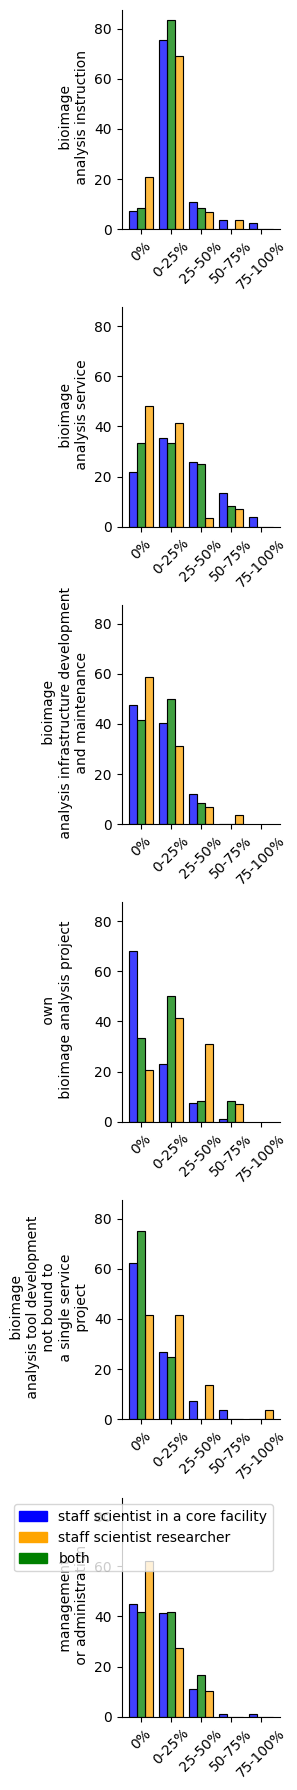

In [13]:
palette_dict = {"staff scientist in a core facility": "blue", "staff scientist researcher": "orange", "both": "green"}

g = sns.FacetGrid(data=selected_df[["staff_scientist_role",] + question_7].melt(id_vars=["staff_scientist_role"]),
            #   col="staff_scientist_role",
              row='variable', 
              row_order=question_7,
              col_order=selection,
              )

g.map_dataframe(sns.histplot, 
                "value",
                 stat="percent",
                 common_norm=False,
                 x="value",
                 hue="staff_scientist_role",
                 multiple="dodge",
                 palette=palette_dict,
                 legend=True,
                 shrink=0.8,)

labels = g.axes[-1, 0].get_xticklabels()
labels = [l.get_text() for l in labels]

for i in range(len(question_7)):
    question_text = ""
    for n, word in enumerate(question_7[i].split("[")[1].split("]")[0].split(" ")):
        if n % 3 == 0:
            word += "\n"
        question_text += " " + word
        
    g.axes[i, 0].set_ylabel(question_text)

    g.axes[i, 0].set_title("")

    g.axes[i, 0].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    g.axes[i, 0].set_xlabel("")
    g.axes[i, 0].set_xticks(list(range(len(labels))))
    g.axes[i, 0].set_xticklabels(labels, rotation=45)
    
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patches = []
for key, value in palette_dict.items():
    patches.append(mpatches.Patch(color=value, label=key))
plt.legend(handles=patches)
g.tight_layout()

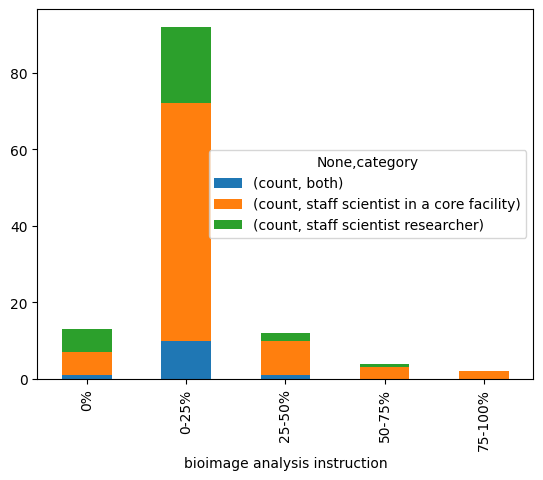

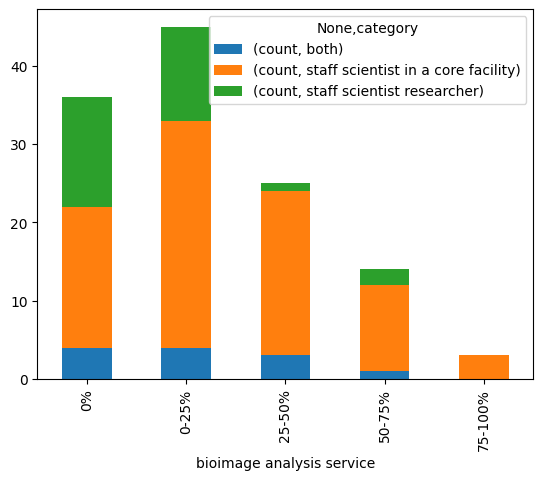

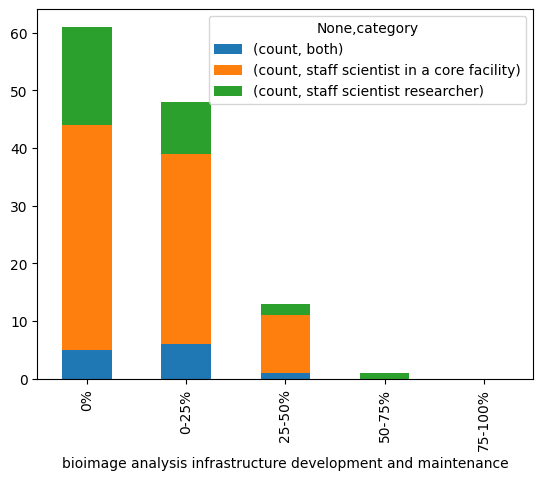

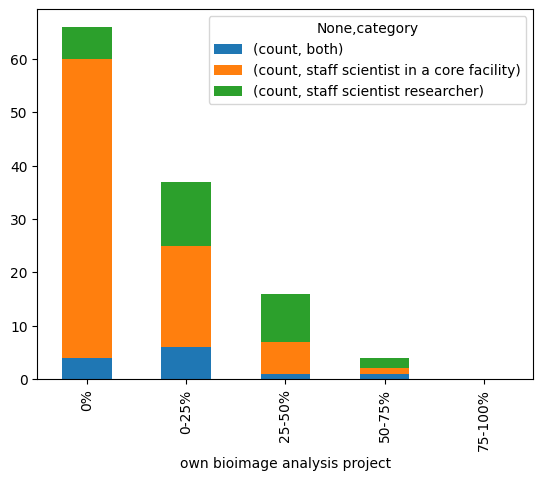

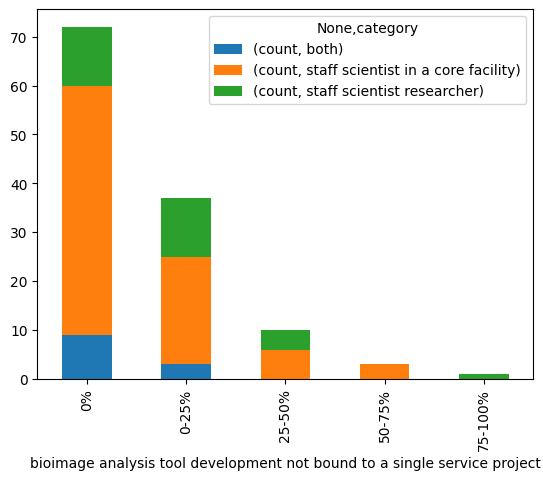

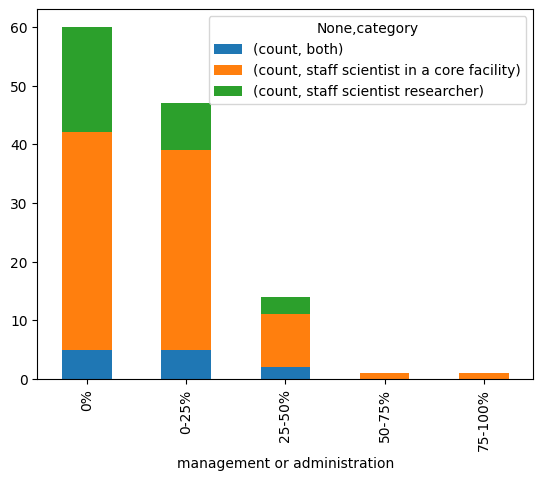

In [14]:
stack_column = "staff_scientist_role"

for question in question_7:
    question_text = question.split("[")[1].split("]")[0]
    categorized_df = []
    for category, this_df in selected_df.groupby(stack_column):
        this_df = pandas.DataFrame(this_df[question].value_counts())
        this_df = this_df.reset_index()
        this_df["category"] = category
        categorized_df.append(this_df)
    categorized_df = pandas.concat(categorized_df, ignore_index=True)
    categorized_df.rename(columns={question: question_text}, inplace=True)

    categorized_df.set_index([question_text, "category"]).unstack().plot(kind='bar', stacked=True)

From these plot I could see:

**Bioimage analysis instruction**
- Most dedicate between 0-25% of their time.
- Very few dedicate above 50%.
- Not a clear difference between roles.

**Bioimage analysis roles**
- Applicants spend between 0 and 75%, distribution is shifted to higher values respect to bioimage analysis instruction.
- Staff scientist researchers seem to spend a bit less time than the others.

**Infrastructure development and maintenance**
- Distribution looks shifted to lower values, less than 25%.

**Own bioimage analysis project**
- Staff scientist researchers (only or both) seem to spend more time in their own projects than staff scientists in core facilities.

**Tool development not bound to a single project**
- Staff scientist researchers seem to spend more time than other categories.

**Management or administration**
- Staff scientists in core facilities (only or both) seem to spend more time than staff scientist researchers.